Optimum solution: [0.99953209 0.99866982]
Optimum Value of objective function: 5.768999483667129e-05 in 39 iterations
computation time is 0.0 sec


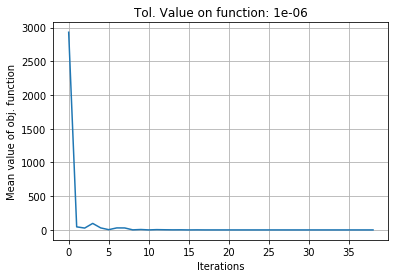

In [31]:
#PSO Unconstraint - Minimization Problem 
#Minimization of Rosenbrock Function
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#Objective-Function Evaluation - 
def func(x):
    value = 20*(x[:,1] - x[:,0]**2)**2 + (1 - x[:,0])**2
    #(x[:,0] + 2*x[:,1] - 7)**2 + (2*x[:,0] + x[:,1] - 5)**2
    return value
    
#Finding Global Best 
def gbest(fv, x, row, u, value):
    if value > np.min(fv):
        value, row = np.amin(fv), np.argmin(fv)
        u = x[row, :]
    return u, row, value

#Finding Personal Best 
def pbest(fv, x, p, valuep):
    for k in range(size):
        if valuep[k] > fv[k]:
            valuep[k]= fv[k]  
            p[:,k] = x[k]
    return p, valuep


#Main Code
start = time.process_time()
nov = 2   #Number of Variables 
size = 100 #Swarm Size or Number of particels 

#Initialization of values of swarms (particels) for iterations
x = np.random.uniform(-5, 5, size = (size, nov)) 
tol = 10**-6 #Tolerance Value (Stopping Criterion)

#Varialbes Associated With Program
f = 1  
pre = 0
max_iter = 200 #max number of Iterations 
i = 0
row = 0
u = 0
p = np.zeros((nov, size)) 
value = 10**20
valuep = np.array([value]*size)
v = np.zeros((nov, size))
c1 = 2 #Cognitive Behavior Constants, c1 & c2 
c2 = 1
tmax, tmin = 0.9, 0.4
arr1 = np.array([])
arr2 = np.array([])

while abs(f - pre) > tol and i < max_iter:
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    t = tmax - (tmax - tmin)*i/max_iter
    pre = f
    fv = func(x)
    u, row, value = gbest(fv, x, row, u, value)
    g = u
    g = np.tile(g.reshape((nov,1)), size)
    p, valup = pbest(fv, x, p, valuep)
    v = 0.73*(t*v + c1*r1*(p - x.transpose()) + c2*r2*(g - x.transpose()))
    x = x + v.transpose()
    x[x>5] = 5                 #Bounds on values of particels 
    x[x<-5] = -5
    f = np.mean(fv)
    arr1 = np.append(arr1, i)
    arr2 = np.append(arr2, f)
    i += 1
    
elapsed = time.process_time()
el = elapsed - start
print("Optimum solution:", x[1])
print("Optimum Value of objective function:", f, "in", i, "iterations")
print("computation time is {} sec".format(el))
plt.plot(arr1, arr2)
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("Mean value of obj. function")
plt.title("Tol. Value on function: {}".format(tol))
plt.show()